In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout


In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='F:/cats and dog/train',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory='F:/cats and dog/test',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
#normalize
def process(image,lable):
    image=tf.cast(image/255. ,tf.float32)
    return image,lable
train_ds= train_ds.map(process)
validation_ds= validation_ds.map(process)


In [15]:
#CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu', ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
              

In [17]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)


Epoch 1/10
625/625 [==============================] - 149s 236ms/step - loss: 1.2767 - accuracy: 0.5899 - val_loss: 0.6429 - val_accuracy: 0.6732
Epoch 2/10
625/625 [==============================] - 149s 238ms/step - loss: 0.5934 - accuracy: 0.7006 - val_loss: 0.5727 - val_accuracy: 0.6806
Epoch 3/10
625/625 [==============================] - 150s 240ms/step - loss: 0.4896 - accuracy: 0.7673 - val_loss: 0.5711 - val_accuracy: 0.6926
Epoch 4/10
625/625 [==============================] - 145s 232ms/step - loss: 0.4335 - accuracy: 0.7933 - val_loss: 0.6034 - val_accuracy: 0.6858
Epoch 5/10
625/625 [==============================] - 148s 236ms/step - loss: 0.3976 - accuracy: 0.8184 - val_loss: 0.8491 - val_accuracy: 0.6120
Epoch 6/10
625/625 [==============================] - 148s 236ms/step - loss: 0.3242 - accuracy: 0.8554 - val_loss: 0.8890 - val_accuracy: 0.7068
Epoch 7/10
625/625 [==============================] - 147s 236ms/step - loss: 0.2548 - accuracy: 0.8882 - val_loss: 0.6004 -

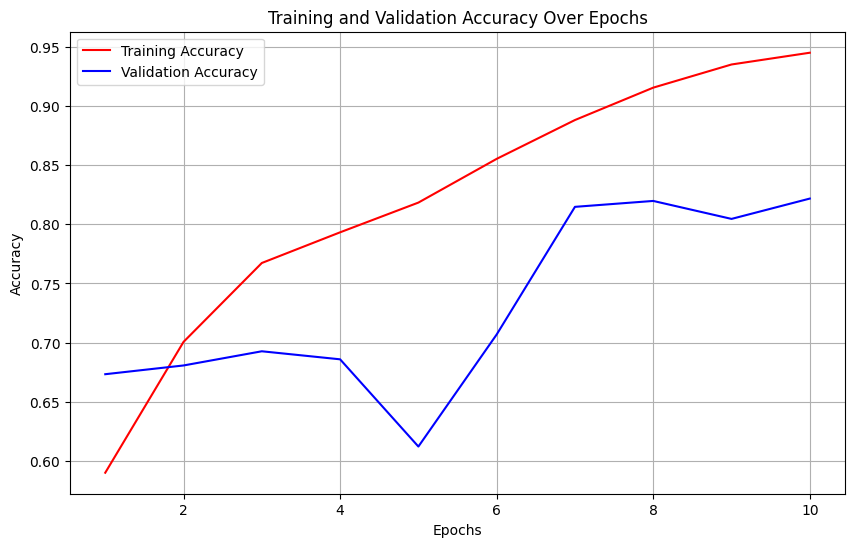

In [18]:
import matplotlib.pyplot as plt
# Extract accuracy values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(1, len(acc) + 1)

# Plot the accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
import cv2
test_img = cv2.imread("F:\cats and dog\cat-8540772_1280.jpg")
test_img = cv2.resize(test_img, (256, 256))
test_img = test_img.astype('float32') / 255.0  # Normalize like training
test_input = test_img.reshape((1, 256, 256, 3))  # Add batch dimension

prediction = model.predict(test_input)
print(prediction)
class_label = 'dog' if prediction[0][0] > 0.5 else 'cat'
print(f"Predicted: {class_label} (probability: {prediction[0][0]:.4f})")


1/1 [==============================] - 0s 32ms/step
[[0.00019065]]
Predicted: cat (probability: 0.0002)
